# LESSON 5: LOGISTIC REGRESSION
<table><tr>
<td> <img src="../images/linear_logistic_regression_logo.jpeg" width="600px"/> </td>
</tr></table>

*This lecture was refered by [machinelearningcoban.com](https://machinelearningcoban.com/2017/01/27/logisticregression/)*

## 1. Logistic regression introduction

<img src="../images/logistic_regression_example.png" width="400px"/>

The prediction of linear regression is calculated by $\hat{y} = X{\theta}$. So the output of linear regression is a continuous value ranged from $- \infty$ to $+ \infty$.

Linear regression is modified to become **LOGISTIC REGRESSION** by apply a logistic activation function to the output of linear regression.

<center>
    $\hat{y} = \sigma(X{\theta})$
</center>


## 2. Logistic activation function
Sigmoid, Softmax and Tanh are logistic activation functions for classification problem.


### 2.1. Sigmoid

Sigmoid function get any input value and give an output in range from 0 to 1.

This value can be understand as probability.

<img src="../images/logistic_regression_sigmoid.png" width="300px"/>

### 2.2. Tanh

The difference between Sigmoid and Tanh is range of output value.

Tanh give an output in range from -1 to 1.

<img src="../images/logistic_regression_tanh.png" width="300px"/>

We can easily change the range of output value of tanh from $[-1, 1]$ to $[0, 1]$.

<center>
    \[
    \text{tanh}(z) = 2\sigma(2z) - 1
    \]
</center>

### 2.3. Softmax

Like Sigmoid, Softmax give an output in range from 0 to 1.

But, while Sigmoid is applied for each value independently, Softmax is applied for all the outputs.

<img src="../images/logistic_regression_softmax.jpeg" width="300px"/>

## 3. Loss function and Optimizer for Logistic Regression
We use sigmoid as logistic activation function for logistic regression.

With a sample ${x}^{i}$ in the dataset, we have $\sigma({x}^{i}{\theta})$ is a probability of sample ${x}^{i}$ belong to class 1 and $1 - \sigma({x}^{i}{\theta})$ is a probability of sample ${x}^{i}$ belong to class 0.

<center>
    \[
    P(y^i = 1 | x^i, \theta) = \sigma(\theta x^i) = \hat{y}^i \\
    P(y^i = 0 | x^i, \theta) = 1 - \sigma(\theta x^i) = 1 - \hat{y}^i
    \]
</center>

Combine two above functions, we have a new function to maximize

<center>
    \[
    P(y^i| x^i, \theta) = (\hat{y}^i)^{y^i} (1 - \hat{y}^i)^{(1 - y^i)} \\
    P(y|X, \theta) = \prod_{i=1}^m P(y^i| x^i, \theta) = \prod_{i=1}^m (\hat{y}^i)^{y^i} (1 - \hat{y}^i)^{(1 - y^i)}\\
    P(y|X, \theta) = (\hat{y})^{y} (1 - \hat{y})^{(1 - y)}
    \]
</center>

We need to find the ${\theta}$ to maximize the value of above function and this ${\theta}$ called an ***optimal point***.

<center>
    ${\theta}^{*} = \arg\max_{\theta} P(y|X, \theta)$
</center>

Every value $\hat{y}^i$ or $1 - \hat{y}^i$ is lower than 1.

Product of lots of these value can cause numerical error, because the product is almost equal to 0.

So we use logarit to change from product to sum, and add the negative sign to build a new loss function - ***CROSS ENTROPY LOSS FUNCTION***.

In logistic regression, we have 2 classes so we call it ***BINARY CROSS ENTROPY***.

<center>
    \[
    \mathcal{L}(\theta) = - \log (P(y|X, \theta)) \\
    = - (\log \hat{y}^{y} + \log(1 - \hat{y})^{(1 - y)}) \\
    = - (y \log \hat{y} + (1 - y) \log(1 - \hat{y})) \\
    = - \sum_i^m (y^i \log \hat{y}^i + (1 - y^i) \log(1 - \hat{y}^i))
    \]
</center>

Instead of finding ${\theta}^{*} = \arg\max_{\theta} P(y|X, \theta)$, we find ${\theta}^{*} = \arg\min_{\theta} - \log (P(y|X, \theta))$

To find the optimal point $\vec{\theta}^{*}$, we solve the equation:

<center>
    \[
    \frac{\partial \mathcal{L}}{\partial {\theta}}
    = \frac{\partial \mathcal{L}}{\partial {\sigma}} \cdot \frac{\partial \sigma}{\partial {\theta}}
    = \frac{\hat{y} - y}{\hat{y}(1 - \hat{y})} \cdot \frac{\partial \sigma}{\partial {\theta}}
    \]
</center>

We have $\sigma'(s) = \sigma(s) ( 1 - \sigma(s))$, so

<center>
    \[
    \frac{\partial \sigma}{\partial \theta} = \hat{y}(1 - \hat{y})X
    \]
</center>

And we have

<center>
    \[
    \frac{\partial \mathcal{L}}{\partial {\theta}}
    = \frac{\hat{y} - y}{\hat{y}(1 - \hat{y})} \cdot \hat{y}(1 - \hat{y})X
    = (\hat{y} - y)X \\
    \frac{\partial \mathcal{L}}{\partial {\theta}} = (\hat{y} - y)X
    \]
</center>

For each sample from the dataset,

<center>
    \[
    \frac{\partial \mathcal{L}(\theta, x^i, y^i)}{\partial {\theta}} = (\hat{y}^i - y^i)x^i
    \]
</center>

Using SGD, we have fomular to update parameters

<center>
    \[
    \theta = \theta + \eta(\hat{y}^i - y^i)x^i
    \]
</center>

## 4. Implementation example

### 4.1. Prepare library and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris_df = iris_df.drop(columns=['petal_length', 'petal_width'])
iris_df

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
145,6.7,3.0,virginica
146,6.3,2.5,virginica
147,6.5,3.0,virginica
148,6.2,3.4,virginica


In [4]:
iris_df['is_setosa'] = iris_df.species.apply(
    lambda x: True if x == 'setosa' else False)
iris_df

,sepal_length,sepal_width,species,is_setosa
0,5.1,3.5,setosa,True
1,4.9,3.0,setosa,True
2,4.7,3.2,setosa,True
3,4.6,3.1,setosa,True
4,5.0,3.6,setosa,True
...,...,...,...,...
145,6.7,3.0,virginica,False
146,6.3,2.5,virginica,False
147,6.5,3.0,virginica,False
148,6.2,3.4,virginica,False


In [5]:
iris_setosa_df = iris_df[iris_df.is_setosa]
iris_setosa_df.head()

,sepal_length,sepal_width,species,is_setosa
0,5.1,3.5,setosa,True
1,4.9,3.0,setosa,True
2,4.7,3.2,setosa,True
3,4.6,3.1,setosa,True
4,5.0,3.6,setosa,True


In [6]:
iris_not_setosa_df = iris_df[~iris_df.is_setosa].sample(50, random_state=1)
iris_not_setosa_df.head()

,sepal_length,sepal_width,species,is_setosa
130,7.4,2.8,virginica,False
134,6.1,2.6,virginica,False
83,6.0,2.7,versicolor,False
131,7.9,3.8,virginica,False
143,6.8,3.2,virginica,False


In [7]:
df = pd.concat([iris_setosa_df, iris_not_setosa_df])
df

,sepal_length,sepal_width,species,is_setosa
0,5.1,3.5,setosa,True
1,4.9,3.0,setosa,True
2,4.7,3.2,setosa,True
3,4.6,3.1,setosa,True
4,5.0,3.6,setosa,True
...,...,...,...,...
91,6.1,3.0,versicolor,False
95,5.7,3.0,versicolor,False
141,6.9,3.1,virginica,False
76,6.8,2.8,versicolor,False


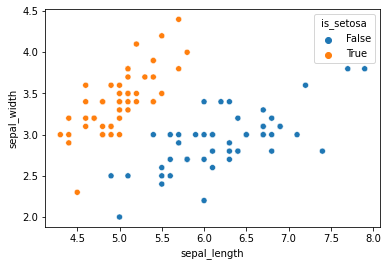

In [8]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='is_setosa')
plt.show()

In [9]:
df

,sepal_length,sepal_width,species,is_setosa
0,5.1,3.5,setosa,True
1,4.9,3.0,setosa,True
2,4.7,3.2,setosa,True
3,4.6,3.1,setosa,True
4,5.0,3.6,setosa,True
...,...,...,...,...
91,6.1,3.0,versicolor,False
95,5.7,3.0,versicolor,False
141,6.9,3.1,virginica,False
76,6.8,2.8,versicolor,False


In [10]:
def prepare_X_ones(X):
    x_1 = np.ones((1, X.shape[1]))
    print('x_0.shape', x_1.shape)

    X = np.concatenate((x_1, X), axis=0).T
    print('X.shape', X.shape)

    return X

In [11]:
X = df.iloc[:, :2].T
X.shape

(2, 100)

In [12]:
X = prepare_X_ones(X)
X.shape

x_0.shape (1, 100)
X.shape (100, 3)


(100, 3)

In [13]:
y = df.is_setosa
y.shape

(100,)

### 4.2. Implement from scratch

In [14]:
class MyLogisticRegression():
    
    def __init__(self, max_iter):
        self.max_iter = max_iter

    def __call__(self, X, y, lr):
        # Init randomly weights
        w_init = np.random.randn(X.shape[1], 1)
        w = [w_init]

        count = 0
        while count < self.max_iter:
            # Shuffle dataset to run SGD
            for i in np.random.permutation(X.shape[0]):
                x_i = X[i, :].reshape(1, X.shape[1])

                # Calculate logistic regression
                z_i = self.sigmoid(x_i.dot(w[-1]))
                
                # Calculate grad and update weights
                w_new = w[-1] - lr * x_i.T.dot(z_i - y[i])

                count += 1

                # Stopping criteria
                if count % 20 == 0:                
                    if np.linalg.norm(w_new - w[-20]) < 1e-4:
                        self.w = w[-1]
                        return

                w.append(w_new)
        self.w = w[-1]

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    def predict(self, X):
        pred_proba = self.sigmoid(X.dot(self.w))
        pred = np.where(pred_proba > 0.5, 1, 0)
        return pred_proba, pred
    
    def display(self, X, y, w=None):

        reg_x = np.linspace(4, 8, 2)
        reg_y = \
        (- self.w[0][0] / self.w[2][0]) + \
        (- self.w[1][0] / self.w[2][0]) * reg_x

        plt.plot(X[:50, 1], X[:50, 2], 'ro')
        plt.plot(X[50:, 1], X[50:, 2], 'bo')
        plt.plot(reg_x, reg_y, 'g-')
        
        if w is not None:
            reg_y = (- w[0][0] / w[2][0]) + (- w[1][0] / w[2][0]) * reg_x
            plt.plot(reg_x, reg_y, 'k-')

        plt.xlabel('sepal_length')
        plt.ylabel('sepal_width')
        plt.xlim(3.5, 8.5)
        plt.ylim(1.5, 5)
        plt.show()

In [15]:
my_logistic_regression = MyLogisticRegression(
    max_iter=10000
)

In [16]:
my_logistic_regression(
    X=X,
    y=np.array(y),
    lr=0.05
)

In [17]:
my_logistic_regression.w

array([[ 3.24014225],
       [-5.21784002],
       [ 8.17412767]])

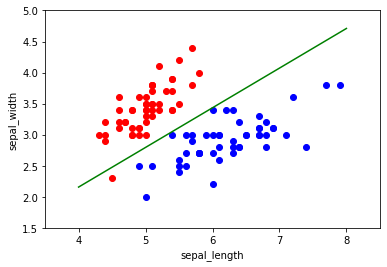

In [18]:
my_logistic_regression.display(X, y)

In [19]:
my_y_pred_proba, my_y_pred = my_logistic_regression.predict(X)
my_y_pred.shape

(100, 1)

### 4.3. Use `sklearn`

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [21]:
sklearn_logistic_regression = LogisticRegression(fit_intercept=False)
sklearn_logistic_regression

LogisticRegression(fit_intercept=False)

In [22]:
sklearn_logistic_regression.fit(X, y)

LogisticRegression(fit_intercept=False)

In [23]:
sklearn_logistic_regression.coef_

array([[ 0.77975848, -2.20636946,  3.62258391]])

In [24]:
my_logistic_regression.w

array([[ 3.24014225],
       [-5.21784002],
       [ 8.17412767]])

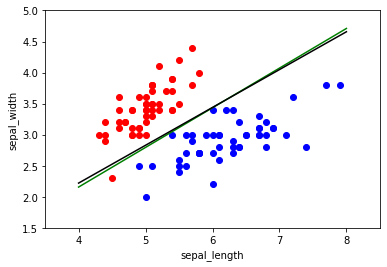

In [25]:
my_logistic_regression.display(X, y, sklearn_logistic_regression.coef_.T)

In [26]:
sklearn_y_pred = sklearn_logistic_regression.predict(X)
sklearn_y_pred.shape

(100,)

In [27]:
print(classification_report(sklearn_y_pred, y))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99        51
        True       0.98      1.00      0.99        49

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [28]:
print(classification_report(my_y_pred, y))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.98      1.00      0.99        49

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



## 5. Homework